In [133]:
import numpy as np
import matplotlib.pyplot as plt



In [134]:

data = np.loadtxt('ex2data2.txt', dtype=str, delimiter=',')

In [135]:

m,n=data.shape
print(m,n)

118 3


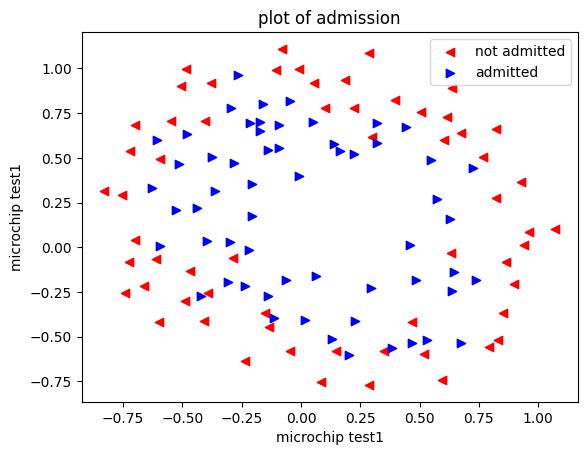

In [136]:

x1=np.zeros((m,1))
x2=np.zeros((m,1))
y=np.zeros((m,1))
x1[:,0]=data[:,0]
x2[:,0]=data[:,1]
y[:,0]=data[:,2]
# Create the scatter plot
plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='<', label="not admitted")
plt.scatter(x1[y == 1], x2[y == 1],c='blue', marker='>', label="admitted")

# Add labels and title
plt.xlabel('microchip test1')
plt.ylabel('microchip test1')
plt.title('plot of admission')
plt.legend()


In [137]:

from sklearn.preprocessing import PolynomialFeatures


# Combine the features into a single matrix
X = np.column_stack((x1, x2))

# Create PolynomialFeatures with degree 6
degree = 6
poly = PolynomialFeatures(degree=degree)

# Transform the original features to the new polynomial features
X_poly = poly.fit_transform(X)

# Get the names of the new features
feature_names = poly.get_feature_names_out(['x1', 'x2'])

# Print the feature names
print(feature_names)

['1' 'x1' 'x2' 'x1^2' 'x1 x2' 'x2^2' 'x1^3' 'x1^2 x2' 'x1 x2^2' 'x2^3'
 'x1^4' 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x1^5' 'x1^4 x2'
 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4' 'x2^5' 'x1^6' 'x1^5 x2' 'x1^4 x2^2'
 'x1^3 x2^3' 'x1^2 x2^4' 'x1 x2^5' 'x2^6']


In [138]:
def parameter(lm,alpha,num_iterations):
    lm=lm
    alpha =alpha
    num_iterations =num_iterations
    cost_history = np.zeros((num_iterations, 1))
    iteration_history = np.arange(num_iterations).reshape(-1, 1)
    x3 = np.transpose(X_poly)
    theta = np.zeros((27, 1))
    theta1=np.zeros((1, 1))
    cost_history,theta,theta1=optimasation(lm,alpha,num_iterations,x3,theta,theta1,cost_history)
    return cost_history,theta,theta1,iteration_history


In [139]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [140]:

def Costfunction(h, y,theta,lm):
    epsilon = 1e-15  # Small constant to avoid division by zero
    clipped_h = np.clip(h, epsilon, 1 - epsilon)  # Clip h between epsilon and 1-epsilon
    return -(1/m) * np.sum(y * np.log(clipped_h) + (1 - y) * np.log(1 - clipped_h))+ (lm/(2*m))*(np.sum(np.square(theta)))

In [141]:
def optimasation(lm,alpha,num_iterations,x3,theta,theta1,cost_history):
    for i in range(num_iterations):
        ctheta = np.concatenate((theta1,theta)) 
        h = sigmoid(X_poly.dot(ctheta))  # Calculate hypothesis using sigmoid function
        cost_history[i, 0] = Costfunction(h, y,theta,lm)
        gradient1 = (1/m) * np.dot(x3[0,:], (h - y))
        gradient2 = (1/m) * np.dot(x3[1:,:], (h - y))  # Compute gradient of cost function
        theta1=theta1 - (alpha * gradient1)
        theta = theta- (alpha * gradient2) + (lm/m) * (theta)
        #cost_history[i, 0] = Costfunction(h, y,ctheta,lm)  # Calculate and store the cost
    # Print learned parameters and final cost                                
    final_cost = cost_history[-1, 0]
    print(f"Final Cost for lambda {lm} : {final_cost:.2f}")
    return cost_history,theta,theta1 

In [142]:
def Plot_costfunction_over_iterations(iteration_history, cost_history):
# Plot cost function over iterations
        plt.figure()
        plt.plot(iteration_history, cost_history)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost Function')
        plt.title('Number of Iterations vs Cost Function')
        plt.show()


In [143]:
# Define the function to plot the decision boundary
def plot_decision_boundary(theta, X, y):
    # Create a grid of points
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    x2_min, x2_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    # Flatten the grid and create a matrix of polynomial features
    X_grid = np.column_stack((xx1.ravel(), xx2.ravel()))
    X_poly_grid = poly.fit_transform(X_grid)
    
    # Calculate the probability for each point in the grid
    h = sigmoid(X_poly_grid.dot(theta))
    
    # Reshape the probabilities to match the shape of the grid
    h = h.reshape(xx1.shape)
    
    # Plot the decision boundary (where probability is 0.5)
    plt.contour(xx1, xx2, h, levels=[0.5], colors='green', linewidths=2)

    plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='<', label="not admitted")
    plt.scatter(x1[y == 1], x2[y == 1],c='blue', marker='>', label="admitted")

    # Add labels and title
    plt.xlabel('microchip test1')
    plt.ylabel('microchip test1')
    plt.title('plot of admission')
    plt.legend()
# Plot the data and the decision boundary




In [144]:
cost_history,theta,theta1,iteration_history=parameter(0,1,300000)

Final Cost for lambda 0 : 0.29


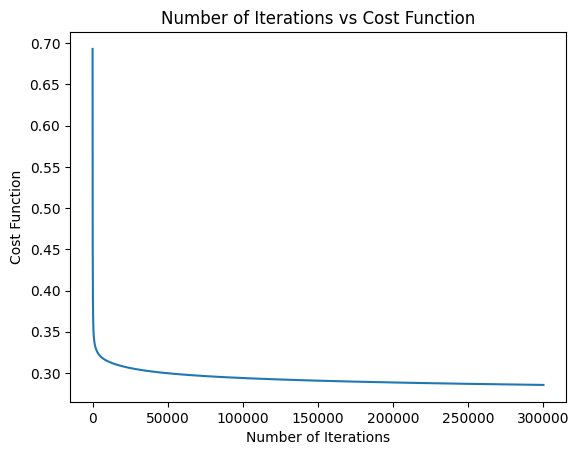

In [145]:
Plot_costfunction_over_iterations(iteration_history, cost_history)

C:\Users\devas\AppData\Local\Temp\ipykernel_22636\1226599341.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


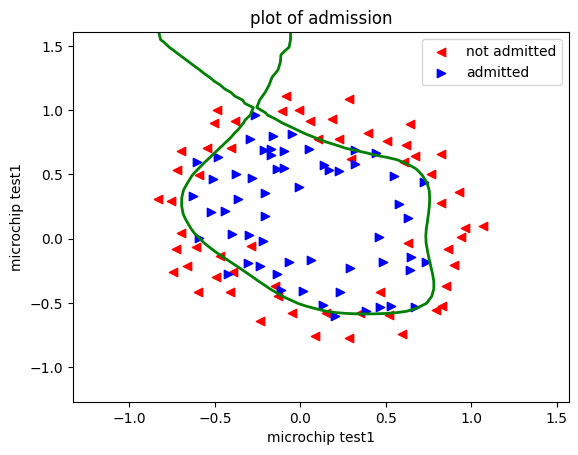

In [146]:
plot_decision_boundary(np.concatenate((theta1,theta)), X_poly, y)
plt.show()

In [147]:

cost_history,theta,theta1,iteration_history=parameter(0.001,.01,40000)

Final Cost for lambda 0.001 : 0.35


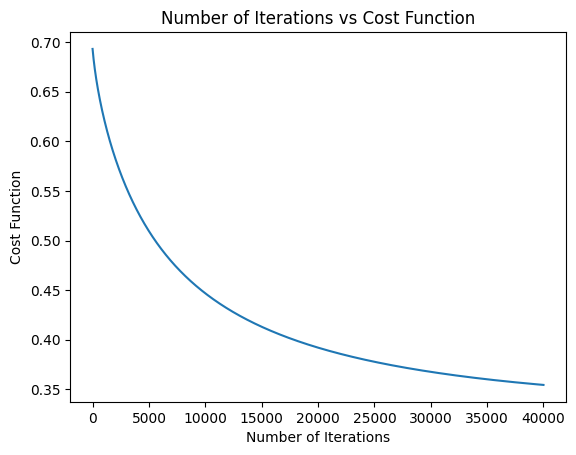

In [148]:

Plot_costfunction_over_iterations(iteration_history, cost_history)

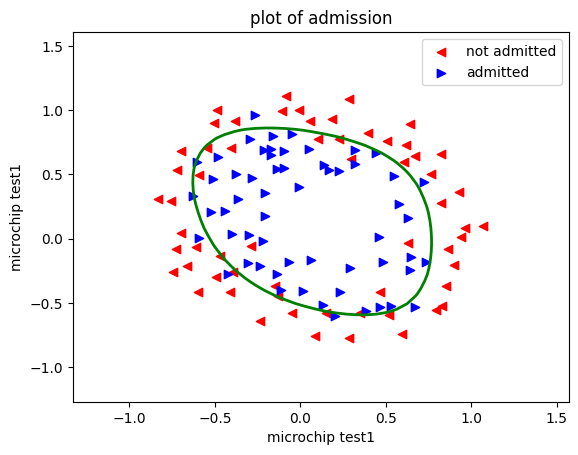

In [149]:

plot_decision_boundary(np.concatenate((theta1,theta)), X_poly, y)
plt.show()

In [150]:

cost_history,theta,theta1,iteration_history=parameter(1,.01,300)

Final Cost for lambda 1 : 0.62


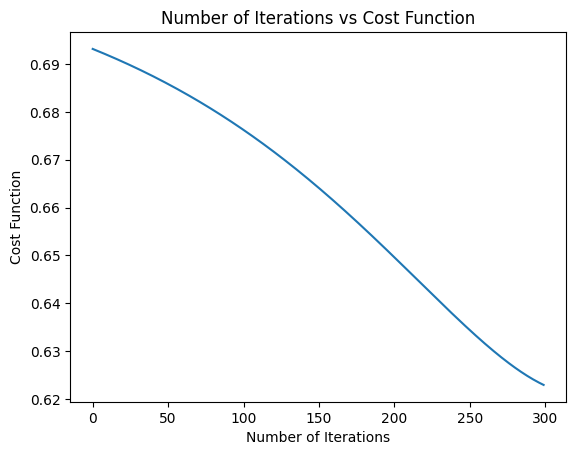

In [151]:

Plot_costfunction_over_iterations(iteration_history, cost_history)

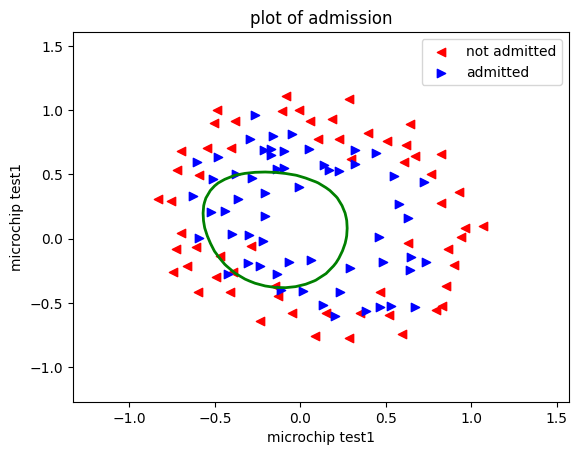

In [152]:

plot_decision_boundary(np.concatenate((theta1,theta)), X_poly, y)
plt.show()